In [37]:
from forecasting_models.model_selector import select_forecasting_model
# from error_metrics.error import error_selector
import pandas as pd

In [38]:
df_alb = pd.read_csv("data/peajes_alberdi_training_preproc.csv")
df_alb['date'] = pd.to_datetime(df_alb['fecha'], format = '%Y-%m-%d')
df_alb.head()

,estacion,fecha,cantidad_pasos,Year-Month,Weekday,Weekday_Name,lag_1,diff_1,avg_by_weekday,cantidad_pasos_deseas,...,month-November,month-October,month-September,Weekday_Name-Monday,Weekday_Name-Saturday,Weekday_Name-Sunday,Weekday_Name-Thursday,Weekday_Name-Tuesday,Weekday_Name-Wednesday,date
0,alberdi,2016-01-01,5446.0,2016-01,4,Friday,NaN,NaN,10208.830601,0.533460,...,0,0,0,0,0,0,0,0,0,2016-01-01
1,alberdi,2016-01-02,6927.0,2016-01,5,Saturday,5446.0,1481.0,8592.125683,0.806203,...,0,0,0,0,1,0,0,0,0,2016-01-02
2,alberdi,2016-01-03,6630.0,2016-01,6,Sunday,6927.0,-297.0,6611.759563,1.002759,...,0,0,0,0,0,1,0,0,0,2016-01-03
3,alberdi,2016-01-04,9835.0,2016-01,0,Monday,6630.0,3205.0,9240.131868,1.064379,...,0,0,0,1,0,0,0,0,0,2016-01-04
4,alberdi,2016-01-05,9091.0,2016-01,1,Tuesday,9835.0,-744.0,9777.725275,0.929766,...,0,0,0,0,0,0,0,1,0,2016-01-05


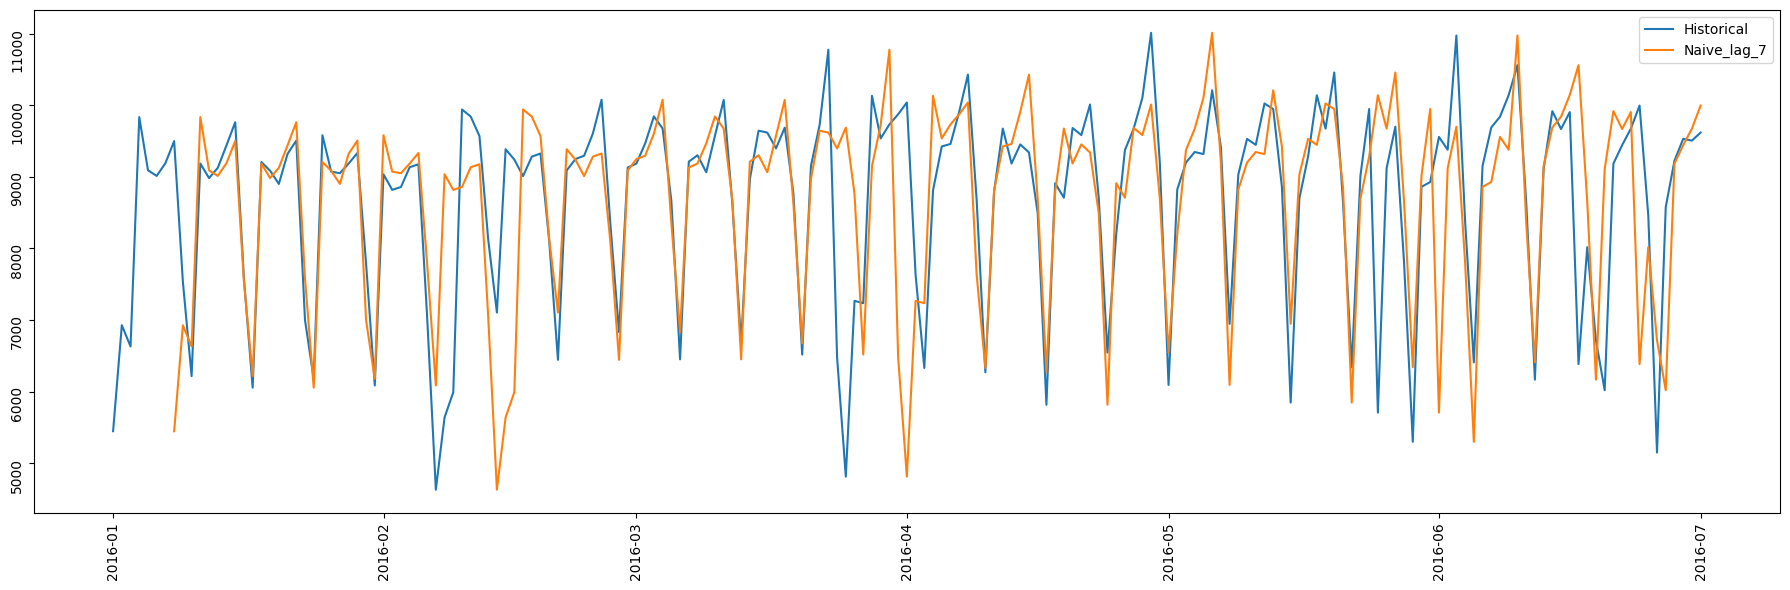

In [39]:
model_class = select_forecasting_model("Naive")
model_instance = model_class(df=df_alb, x_col_name='date', y_col_name='cantidad_pasos', n_periods=7)
model_instance.fit_train()
y_test = model_instance.predict(df_alb['date'])
model_instance.plot_results(start_date='2016-01-01', end_date='2016-07-01')

In [40]:
# # error_class = error_selector("MAPE")
# error_class = ErrorMAE
# y_pred_filter_nan = df_alb[model_instance.model_name].dropna()
# y_true = df_alb[df_alb.index.isin(y_pred_filter_nan.index)]['cantidad_pasos'].dropna()
# y_pred_filter_nan = y_pred_filter_nan[y_pred_filter_nan.index.isin(y_true.index)]
# 
# 
# 
# error_instance = error_class(y_true=y_true, y_pred=y_pred_filter_nan)
# print(error_instance.calculate_error())

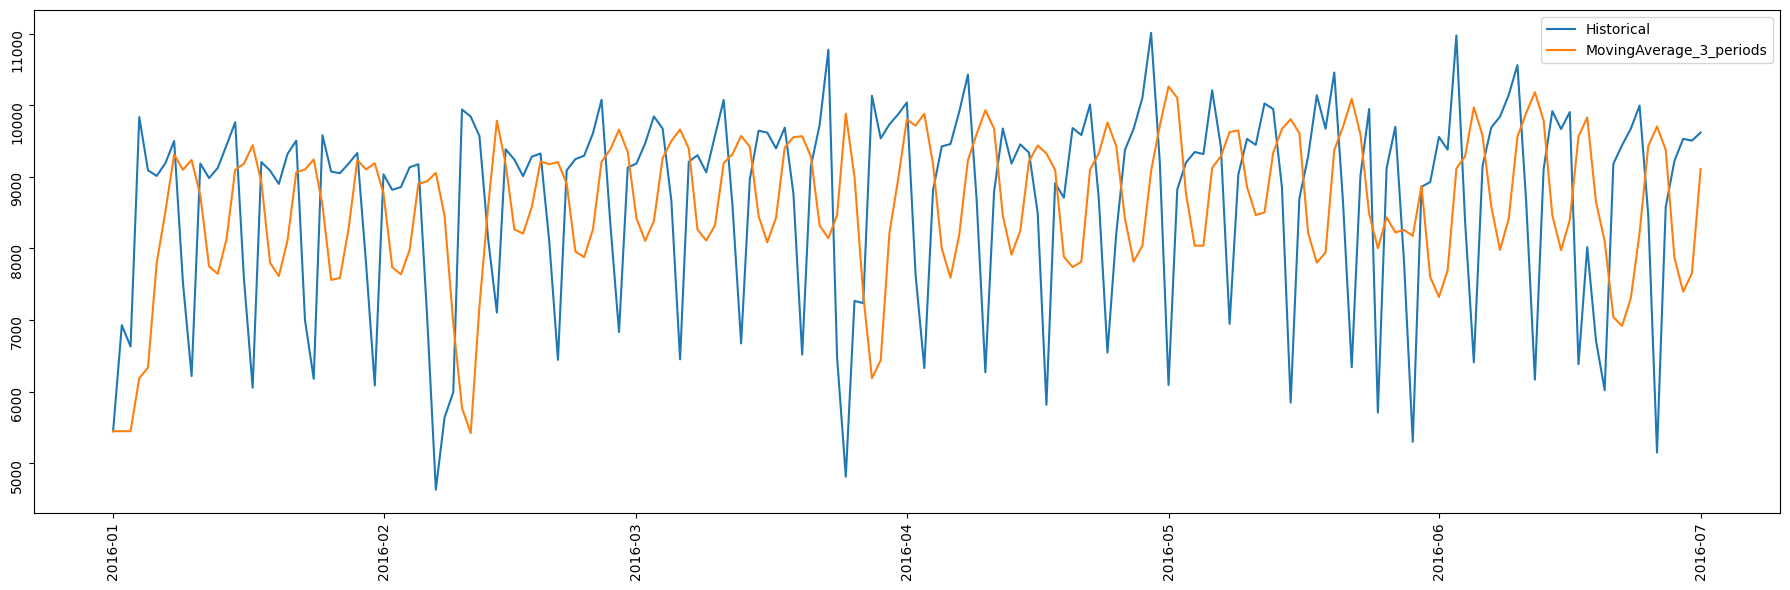

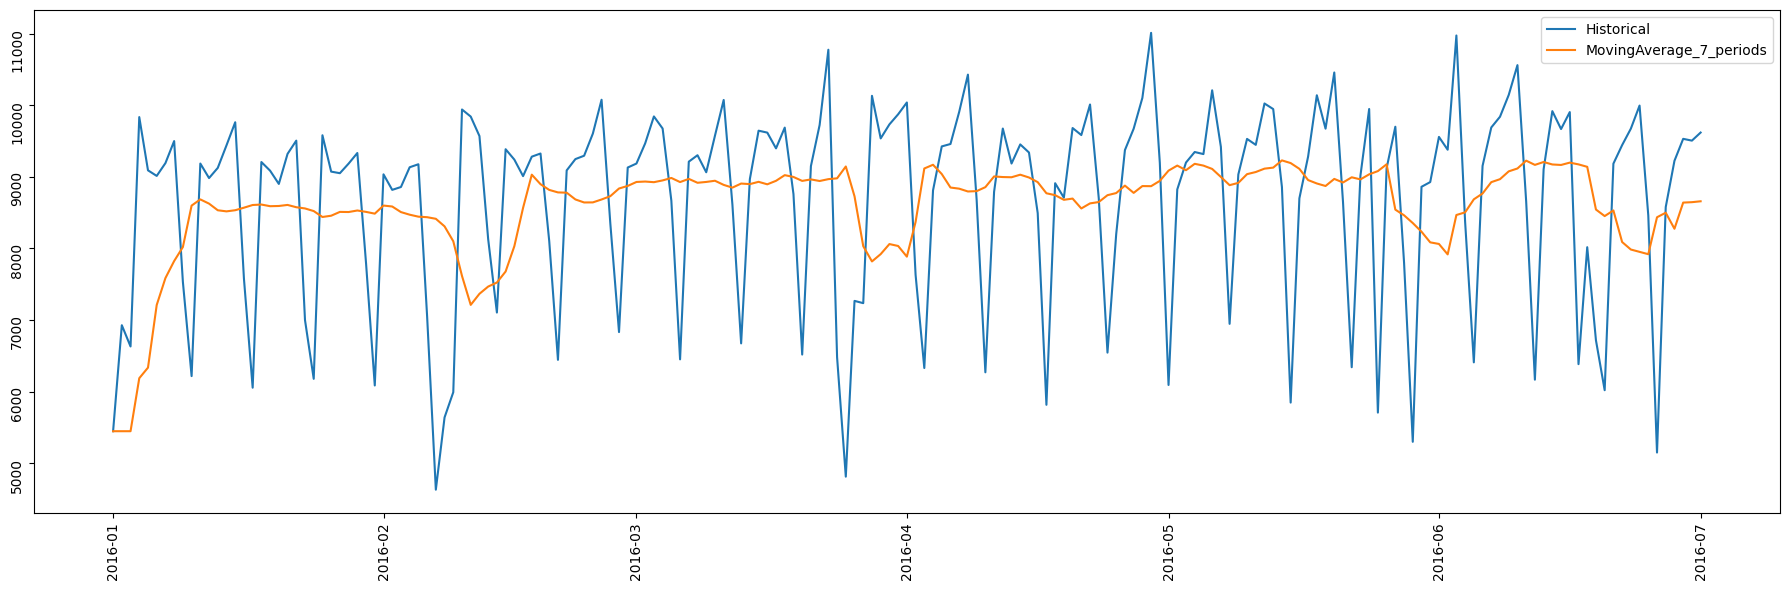

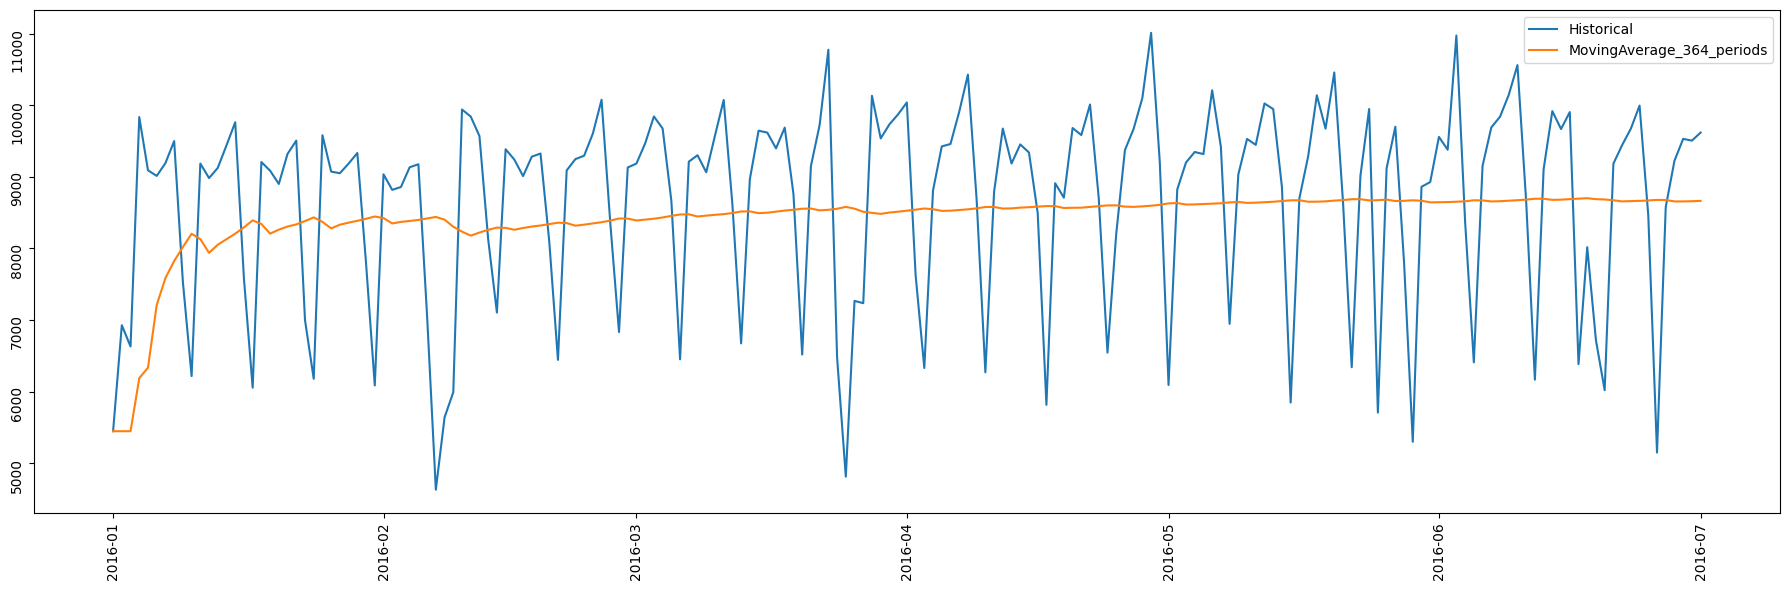

In [41]:
model_class = select_forecasting_model("Rolling Mean")
for period in [3, 7, 364]:
    model_instance = model_class(df=df_alb, x_col_name='date', y_col_name='cantidad_pasos', n_periods=period)
    model_instance.fit_train()
    model_instance.predict(df_alb['date'])
    model_instance.plot_results(start_date='2016-01-01', end_date='2016-07-01')